- spec (Python 3.11.4)

In [78]:
# load libraries for data processing

import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
import pandas as pd
import chemometrics as cm
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
from chemometrics.mcr import McrAR
import chemometrics.mcr.constraint as constraint
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils.extmath import randomized_svd
from scipy.signal import savgol_filter
from mpl_toolkits.mplot3d import Axes3D

In [79]:
# Get CSV files list from a folder
path = 'f:/GAC_KSY/spectrum/1_amaranth/data/NIR_Gachon_amaranth'
mat_files = glob.glob(path + "/*.xlsx")
df_list = [pd.read_excel(file) for file in mat_files]
df = pd.concat(df_list, ignore_index=False, axis = 1, join = "outer")
# import data into dict
data = {}
for file in mat_files:
    data[file.split("/")[-1].replace(".xlsx","").replace('NIR_Gachon_amaranth\\Gachon_','')] = pd.read_excel(file, index_col=0)


info = {'Experiment': df.columns[1:]}
infodf = pd.DataFrame(info)

infodf['Group'] = infodf.Experiment.str.split("_").str[0]
labels = infodf['Group']
le = LabelEncoder().fit_transform(labels)
colors = [plt.cm.jet(float(i)/max(le)) for i in le]
infodf["Colors"] = colors 

wl = pd.Series(df["Cm-1"].to_numpy().ravel(order="K"), name="ref")

def plot_Whittker

In [80]:
def plot_Whittaker(data, infodf):
    r"""
    Plot lines colored by position or `reference`

    Generate a line plot with `x` on x-axis and one or multiple dataseries
    `Y`. The lines are either colored by position in the matrix `Y` or by
    value in the `reference` matrix.
    
    * data[key].iloc[:,i].name  i.e. 'E46_res32_001_230428_104059.0002'

    Parameters
    ----------
    data : dictionary
            key : excel file name, value : pd.dataframe of NIR absorbance
    infodf : pandas dataframe
            columns : ['Experiment', 'Group', 'Colors']
            Experiment = each excel sheet column i.e. 'E46_res32_001_230428_104059.0002'
            Group = Extract or Original i.e. E46
            Colors(Reference values to color data series by) = 
                i.e. (0.2751423149905123, 1.0, 0.6925996204933587, 1.0)
    Y : (n, m) ndarray
        Matrix containing data series to plot. The function expects. `n`
        datapoints in `m` series.
    ax : {None, (n,) ndarray}
        Location on x-axis

    Returns
    -------
    dictionary
    lines : list
        A list of line objects generated by plotting the spectra.
    """
    lines = []
    error_lines = []
    for key in data.keys():
        Y = data[key].values
        Y = cm.Whittaker(constraint_order = 3, deriv=2).fit_transform(Y)
        ax = data[key].index
        idf = infodf[infodf['Experiment'].isin(data[key].columns)]
        if len(idf) > 0 : 
            for i in range(len(idf["Experiment"])):
                try: 
                    cols = idf[idf['Experiment']==data[key].iloc[:,i].name]["Colors"].values[0]
                    line_i = plt.plot(ax, Y[:,i], c=cols, alpha=0.5)
                    lines.append(line_i[0])
                except IndexError:
                    error_lines.append("%s_%s"%(key,data[key].iloc[:,i].name))
                    print("IndexError",key,data[key].iloc[:,i].name)

        else :
            continue
            print(np.array(error_lines))
    
    rawD = {'plot' : lines, 'error' : error_lines, }
    return lines




In [81]:
# remove duplicate
ud = []
[ud.append(x) for x in infodf["Group"] if x not in ud ]
ud


['E46',
 'E47',
 'O46',
 'O47',
 'Cm-1',
 'E22',
 'E24',
 'E26',
 'E38',
 'E444',
 'E62',
 'E855',
 'E875',
 'E946',
 'O22',
 'O24',
 'O26',
 'O38',
 'O444',
 'O62',
 'O855',
 'O875',
 'O946',
 'O441',
 'O483',
 'O496',
 'O497',
 'O498',
 'S441',
 'S483',
 'S496',
 'S497',
 'S498',
 'Etoh',
 'Water',
 '땅심이E2',
 '땅심이E3',
 '땅심이E4',
 '땅심이E5',
 'NR Brain',
 'NR Eyes',
 'NR Gallbladder',
 'NR Gill',
 'NR Heart',
 'NR Intestine',
 'NR Kidney',
 'NR Liver',
 'NR Muscle',
 'NR Ovary',
 'NR Pyloric caeca',
 'NR Skin',
 'NR Stomach',
 'NR Testis',
 '땅심이 O2',
 '땅심이 O3',
 '땅심이 O4',
 '땅심이 O5',
 'Black Bird E2',
 'Black Bird E3',
 'Black Bird E4',
 'Black Bird E5',
 'Black Bird O2',
 'Black Bird O3',
 'Black Bird O4',
 'Black Bird O5',
 'CG Brain',
 'CG Eyes',
 'CG Gill',
 'CG Heart',
 'CG Intestine',
 'CG Liver',
 'CG Muscle',
 'CG Ovary',
 'CG Pyloric caeca',
 'CG Skin',
 'CG Stomach',
 'CG Testis',
 'E441',
 'E483',
 'E496',
 'E497',
 'E498',
 'E13',
 'E14',
 'E16',
 'E19',
 'E23',
 'E25',
 'E4',

In [82]:
import re
rm_word = ['Cm-1', '땅심이', 'NR','CG','S','Water', 'Etoh']

'''for grp in infodf["Group"]:
    if grp in rm_word:
        rm_list.append(grp)
'''
rm_list = []
for grp in infodf["Group"]:
    for word in rm_word:
        if re.search(word, grp):
            # print(grp)
            rm_list.append(grp)
mod_info = infodf[~infodf['Group'].isin(rm_list)]

infodf[~infodf['Group'].isin(rm_list)]["Group"].values

# for check
# mod_info[mod_info['Experiment'].isin([r'O[1-5]_230519'])]
# [len(re.findall('O[1-5]_230519', exp)) > 0 for exp in mod_info['Experiment']]
# for exp in mod_info['Experiment']:
#     if re.search('땅심이 O[1-5]_230519', exp) != None :
#          print(exp) 
# len(re.findall('O[1-5]_230519', '땅심이 O2_230519_212526.0000')) > 0

array(['E46', 'E46', 'E46', 'E47', 'E47', 'E47', 'O46', 'O46', 'O46',
       'O47', 'O47', 'O47', 'E22', 'E22', 'E22', 'E24', 'E24', 'E24',
       'E26', 'E26', 'E26', 'E38', 'E38', 'E38', 'E444', 'E444', 'E444',
       'E62', 'E62', 'E62', 'E855', 'E855', 'E855', 'E875', 'E875',
       'E875', 'E946', 'E946', 'E946', 'O22', 'O22', 'O22', 'O24', 'O24',
       'O24', 'O26', 'O26', 'O26', 'O38', 'O38', 'O38', 'O444', 'O444',
       'O444', 'O62', 'O62', 'O62', 'O855', 'O855', 'O855', 'O875',
       'O875', 'O875', 'O946', 'O946', 'O946', 'O441', 'O441', 'O441',
       'O483', 'O483', 'O483', 'O496', 'O496', 'O496', 'O497', 'O497',
       'O497', 'O498', 'O498', 'O498', 'Black Bird E2', 'Black Bird E2',
       'Black Bird E2', 'Black Bird E3', 'Black Bird E3', 'Black Bird E3',
       'Black Bird E4', 'Black Bird E4', 'Black Bird E4', 'Black Bird E5',
       'Black Bird E5', 'Black Bird E5', 'Black Bird O2', 'Black Bird O2',
       'Black Bird O2', 'Black Bird O3', 'Black Bird O3', 'Black 

Whitakker
- 날짜별
- E vs O

def plot_Savgol

In [ ]:
def plot_Savgol(data, infodf, win_size):
    r"""
    Plot lines colored by position or `reference`

    Generate a line plot with `x` on x-axis and one or multiple dataseries
    `Y`. The lines are either colored by position in the matrix `Y` or by
    value in the `reference` matrix.
    
    * data[key].iloc[:,i].name  i.e. 'E46_res32_001_230428_104059.0002'

    Parameters
    ----------
    data : dictionary
            key : excel file name, value : pd.dataframe of NIR absorbance
    infodf : pandas dataframe
            columns : ['Experiment', 'Group', 'Colors']
            Experiment = each excel sheet column i.e. 'E46_res32_001_230428_104059.0002'
            Group = Extract or Original i.e. E46
            Colors(Reference values to color data series by) = 
                i.e. (0.2751423149905123, 1.0, 0.6925996204933587, 1.0)
    Y : (n, m) ndarray
        Matrix containing data series to plot. The function expects. `n`
        datapoints in `m` series.
    ax : {None, (n,) ndarray}
        Location on x-axis

    Returns
    -------
    dictionary
    lines : list
        A list of line objects generated by plotting the spectra.
    """
    lines = []
    error_lines = []
    for key in data.keys():
        Y = data[key].values
        
        ax = data[key].index
        idf = infodf[infodf['Experiment'].isin(data[key].columns)]
        Y = savgol_filter(Y, int(win_size), polyorder =2, deriv =1)
        if len(idf) > 0 : 

            for i in range(len(idf["Experiment"])):
                
                try: 
                    cols = idf[idf['Experiment']==data[key].iloc[:,i].name]["Colors"].values[0]
                    #print(key,i, len(idf))
                    line_i = plt.plot(ax, Y[:,i], c=cols, alpha=0.5)
                    lines.append(line_i[0])
                except IndexError:
                    error_lines.append("Index:: %s_%s"%(key,data[key].iloc[:,i].name))
                    print("IndexError",key,data[key].iloc[:,i].name)
                except ValueError:
                    error_lines.append("Value:: %s_%s"%(key,data[key].iloc[:,i].name))
                    print("Value Error",key,data[key].iloc[:,i].name,len(idf))
        else :
            continue
            print(np.array(error_lines))
    
    rawD = {'plot' : lines, 'error' : error_lines, }
    return lines




In [ ]:
def pca_Savgol(data, infodf, win_size):
    r"""
    Plot lines colored by position or `reference`

    Generate a line plot with `x` on x-axis and one or multiple dataseries
    `Y`. The lines are either colored by position in the matrix `Y` or by
    value in the `reference` matrix.
    
    * data[key].iloc[:,i].name  i.e. 'E46_res32_001_230428_104059.0002'

    Parameters
    ----------
    data : dictionary
            key : excel file name, value : pd.dataframe of NIR absorbance
    infodf : pandas dataframe
            columns : ['Experiment', 'Group', 'Colors']
            Experiment = each excel sheet column i.e. 'E46_res32_001_230428_104059.0002'
            Group = Extract or Original i.e. E46
            Colors(Reference values to color data series by) = 
                i.e. (0.2751423149905123, 1.0, 0.6925996204933587, 1.0)
    Y : (n, m) ndarray
        Matrix containing data series to plot. The function expects. `n`
        datapoints in `m` series.
    ax : {None, (n,) ndarray}
        Location on x-axis

    Returns
    -------
    dictionary
    lines : list
        A list of line objects generated by plotting the spectra.
    """
    lines = []
    error_lines = []
    YD = {}
    axD = {}
    idD = {}
    
    fig = plt.figure(figsize=(10,9))
    sub = fig.add_subplot(111, projection="3d")
    for key in data.keys():
        Y = data[key].values
        
        ax = data[key].index
        idf = infodf[infodf['Experiment'].isin(data[key].columns)]
        Y = savgol_filter(Y, int(win_size), polyorder =2, deriv =1)

        labels = idf['Group']
        le = LabelEncoder().fit_transform(labels)
        unique = list(set(le))
        print(key, labels)
        YD[key] = Y
        axD[key] = ax
        idD[key] = idf
        pca = PCA(n_components=3)
        Xpca = pca.fit_transform(StandardScaler().fit_transform(Y))
        fig = plt.figure(figsize=(10,9))
        sub = fig.add_subplot(111, projection="3d")
        if len(idf) > 0 : 

            for i, u in enumerate(unique):
                
                try: 
                    xi = [Xpca[j,0] for j  in range(len(Xpca[:,0])) if le[j] == u]
                    yi = [Xpca[j,1] for j  in range(len(Xpca[:,1])) if le[j] == u]
                    zi = [Xpca[j,2] for j  in range(len(Xpca[:,2])) if le[j] == u]
                except IndexError:
                    error_lines.append("Index:: %s_%s"%(key,data[key].iloc[:,i].name))
                    print("IndexError",key,data[key].iloc[:,i].name)
                except ValueError:
                    error_lines.append("Value:: %s_%s"%(key,data[key].iloc[:,i].name))
                    print("Value Error",key,data[key].iloc[:,i].name,len(idf))
            sub.scatter(xi, yi, zi, color=colors[i], s=80, label=str(u))
                    
            sub.view_init(10, 40)

            sub.set_xlabel('PC1')
            sub.set_ylabel('PC2')
            sub.set_zlabel('PC3')

        plt.legend(labels.unique(),loc='upper left')

        # else :
        #     continue
        #     print(np.array(error_lines))
        
    res = {'Y' : YD, 'ax' : axD, 'idf' : idD }
    return res




(460, 57) (57,) (460,)


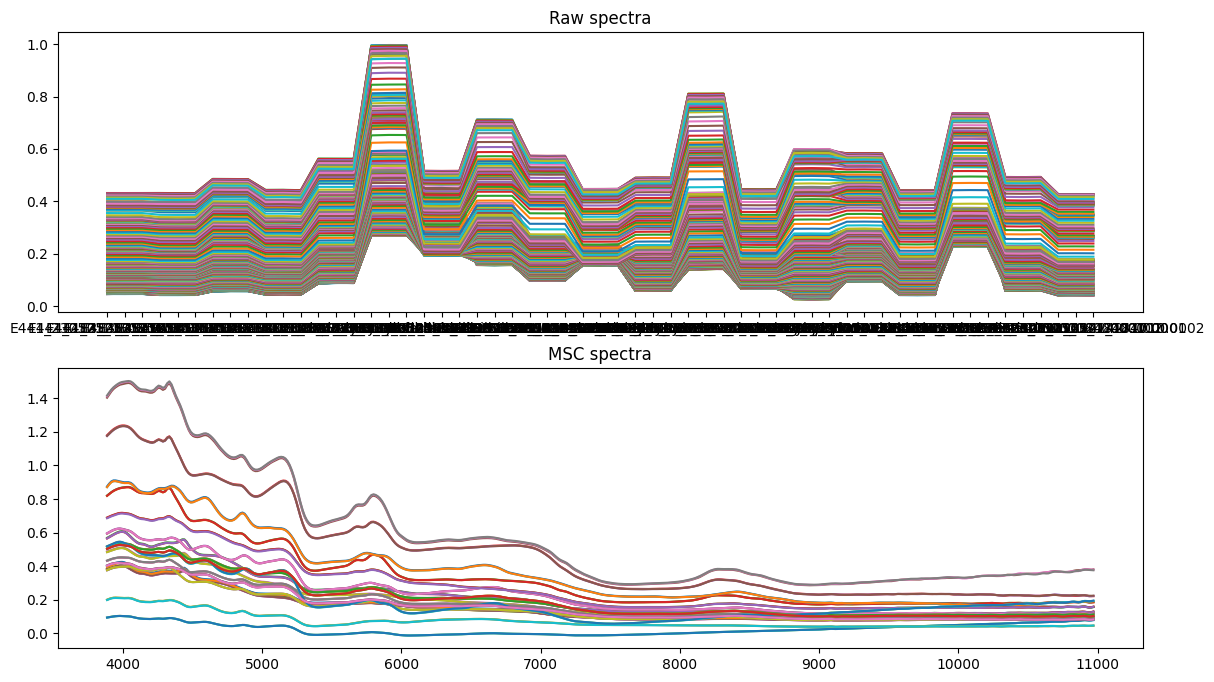

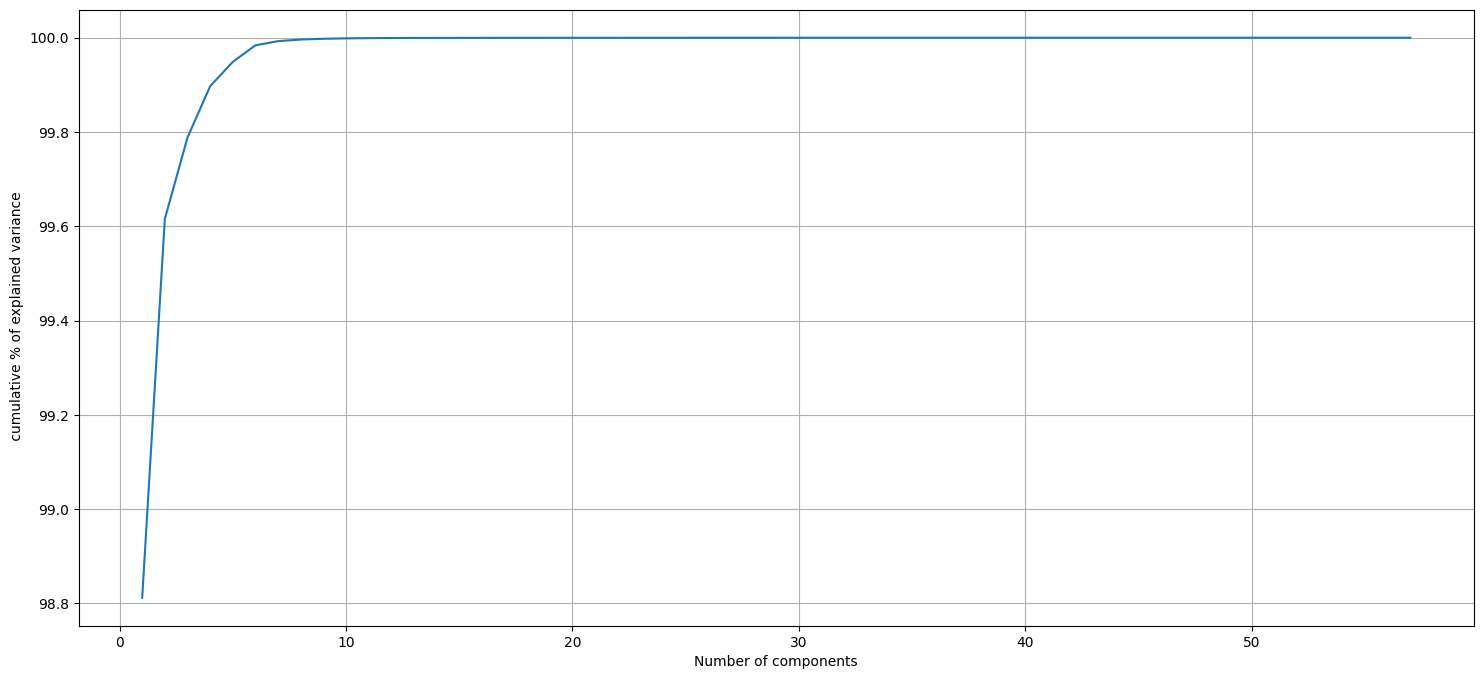

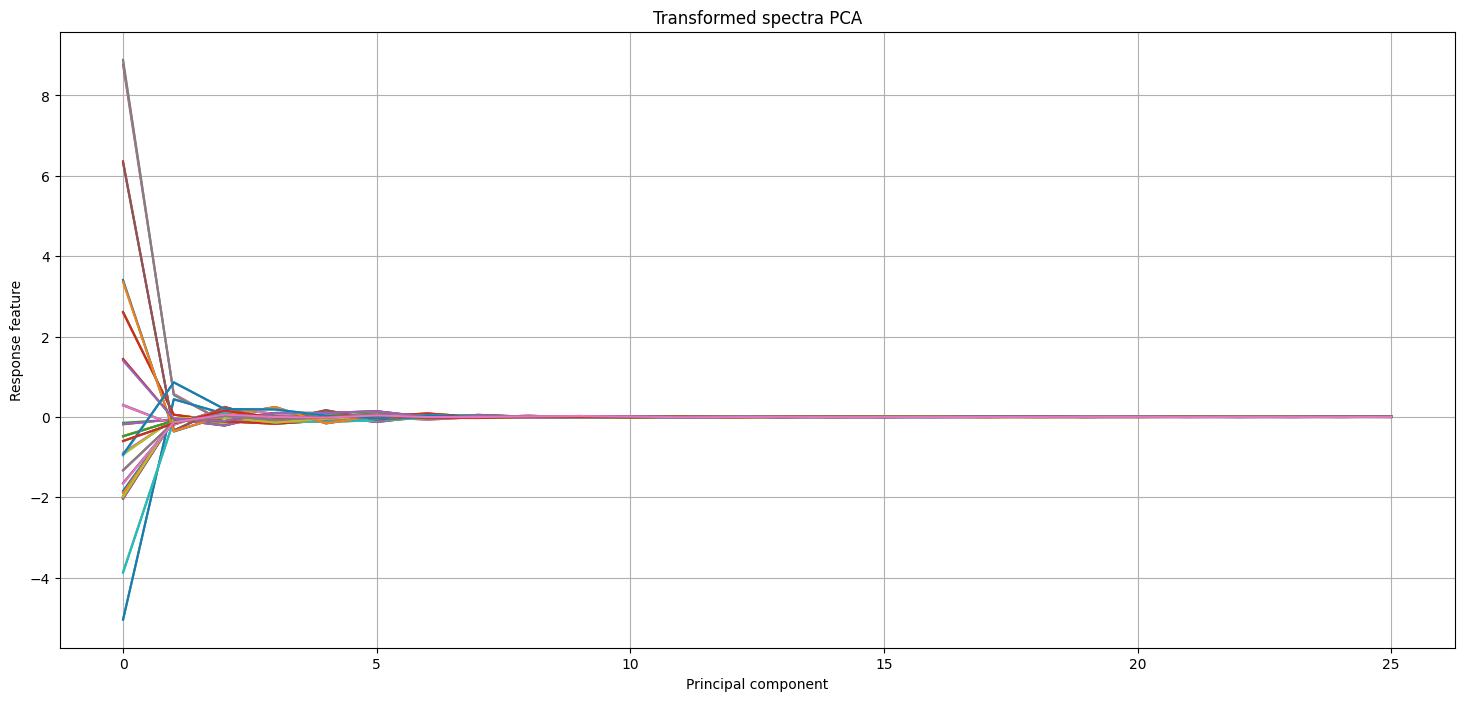

Cm-1,10969.683380,10954.254852,10938.826324,10923.397796,10907.969268,10892.540740,10877.112212,10861.683684,10846.255157,10830.826629,...,4026.845798,4011.417270,3995.988742,3980.560214,3965.131686,3949.703158,3934.274630,3918.846102,3903.417574,3887.989046
E441_230521_180851.0000,0.092842,0.091112,0.090043,0.090716,0.091432,0.090933,0.090037,0.089704,0.090067,0.090603,...,0.398857,0.403155,0.404991,0.404725,0.403025,0.400441,0.397237,0.393580,0.389765,0.386390
E441_230521_180851.0001,0.094078,0.091386,0.089968,0.090544,0.090957,0.090166,0.089392,0.089816,0.090449,0.090197,...,0.396671,0.401007,0.402853,0.402663,0.401057,0.398437,0.395095,0.391365,0.387607,0.384292
E441_230521_180851.0002,0.093177,0.090864,0.089709,0.090490,0.091221,0.090587,0.089610,0.089865,0.091096,0.091595,...,0.397696,0.401965,0.403735,0.403436,0.401840,0.399346,0.396096,0.392369,0.388505,0.385089
E483_230521_181151.0000,0.096933,0.094020,0.091922,0.092034,0.092943,0.093087,0.092662,0.092706,0.093026,0.092667,...,0.396117,0.400646,0.402491,0.401982,0.399974,0.396983,0.393163,0.388883,0.384615,0.380811
E483_230521_181151.0001,0.095564,0.092491,0.091028,0.092392,0.093895,0.093298,0.091629,0.090769,0.090988,0.091310,...,0.394922,0.399447,0.401235,0.400678,0.398657,0.395717,0.391928,0.387471,0.382946,0.379198
E483_230521_181151.0002,0.093466,0.091402,0.090955,0.092166,0.092796,0.091924,0.091121,0.091600,0.092410,0.092448,...,0.396761,0.401264,0.403102,0.402579,0.400597,0.397696,0.393980,0.389735,0.385407,0.381537
E496_230521_181511.0000,0.120575,0.117989,0.115943,0.116265,0.117577,0.117410,0.115970,0.115178,0.115461,0.115601,...,0.505742,0.510597,0.512533,0.511846,0.509540,0.506310,0.502402,0.498004,0.493370,0.489167
E496_230521_181511.0001,0.118756,0.116578,0.115811,0.116937,0.117350,0.116214,0.114875,0.114658,0.115089,0.114843,...,0.501983,0.506785,0.508775,0.508214,0.505895,0.502490,0.498384,0.493832,0.489054,0.484671
E496_230521_181511.0002,0.119535,0.116694,0.115229,0.116437,0.117173,0.115759,0.114139,0.114114,0.115059,0.115398,...,0.501282,0.505960,0.507923,0.507418,0.505176,0.501829,0.497726,0.493176,0.488396,0.483973
E497_230521_181727.0000,0.091554,0.089112,0.088435,0.089945,0.090869,0.089889,0.088646,0.088519,0.088889,0.089019,...,0.415323,0.420592,0.422723,0.422145,0.419941,0.416696,0.412486,0.407605,0.402641,0.398471


In [ ]:
# test
from pyspectra.transformers.spectral_correction import msc, detrend ,sav_gol,snv

infodf = mod_info

#dict_keys(['230428', '230503', '230511', '230512', '230515', '230518',
#  '230519', '230521', '230522', '230528', '230605', '230606', '230610', 
# '230612', '2ndanalysis'])
key = "230521"
df = data[key]
Y = data[key].values
colm = data[key].columns
ind = data[key].index
idf = infodf[infodf['Experiment'].isin(data[key].columns)]
# print(colm)
# print("idf",idf)
# Y = savgol_filter(Y, int(6), polyorder =2, deriv =1)
labels = idf['Group']
le = LabelEncoder().fit_transform(labels)
unique = list(set(le))

print(Y.shape, colm.shape, ind.shape)
MSC = msc()
MSC.fit(df.T)
df_msc = MSC.transform(df.T)
f, ax= plt.subplots(2,1,figsize=(14,8))
ax[0].plot(df.transpose())
ax[0].set_title("Raw spectra")

ax[1].plot(df_msc.transpose())
ax[1].set_title("MSC spectra")
plt.show()

pca = PCA()
pca.fit(df_msc)
plt.figure(figsize = (18, 8))
plt.plot(range(1,len(pca.explained_variance_)+1),100*pca.explained_variance_.cumsum()/pca.explained_variance_.sum())
plt.grid(True)
plt.xlabel("Number of components")
plt.ylabel(" cumulative % of explained variance")

df_pca=pd.DataFrame(pca.transform(df_msc))
plt.figure(figsize=(18,8))
plt.plot(df_pca.loc[:,0:25].transpose())


plt.title("Transformed spectra PCA")
plt.ylabel("Response feature")
plt.xlabel("Principal component")
plt.grid(True)
plt.show()

# fig = plt.figure(figsize=(10,9))
# sub = fig.add_subplot(111, projection="3d")
# print(len(Xpca[:,0]))

# for i, u in enumerate(unique):
#     xi = [Xpca[j,0] for j  in range(len(Xpca[:,0])) if le[j] == u]
#     yi = [Xpca[j,1] for j  in range(len(Xpca[:,1])) if le[j] == u]
#     zi = [Xpca[j,2] for j  in range(len(Xpca[:,2])) if le[j] == u]
#     sub.scatter(xi, yi, zi, color=colors[i], s=80, label=str(u))
 
#     sub.view_init(10, 40)
 
#     sub.set_xlabel('PC1')
#     sub.set_ylabel('PC2')
#     sub.set_zlabel('PC3')
 
#     plt.legend(labels.unique(),loc='upper left')
 
# plt.show()
df_msc


In [107]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
# https://scikit-learn.org/stable/modules/impute.html
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
X, y = load_diabetes(return_X_y=True)
regressor = DecisionTreeRegressor(random_state=0)

cross_val_score(regressor, X, y, cv=10)
X,y

(array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
   

In [ ]:
# test
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, LabelBinarizer

from boxsers.misc_tools import data_split
from boxsers.visual_tools import distribution_plot

def _range_converter(param_range, multiplier_cond=False):
    """
    Returns superior and inferior bounds according to a given range.

    Parameters:
        param_range : float or integer, list or tuple
            Range of possible values for a given value. These values can be specified as follows:
                - param_range = (a, b) or [a, b] --> a is the left limit value and b is the right limit value.
                - (multiplier_cond=False)
                    - param_range = a --> -a is the left limit value and +a is the right limit value.
                - (multiplier_cond=True)
                    - param_range = a --> (1 - a) is the left limit value and (1 + a) is the right limit value.

        multiplier_cond : boolean, default=False
            See above for information

    Returns:
        (float, int) Inferior boudary value.

        (float, int) Superior boundary value.
    """
    param_range_inf = 0.0
    param_range_sup = 0.0

    if isinstance(param_range, list):
        param_range_inf = param_range[0]
        param_range_sup = param_range[1]
    elif isinstance(param_range, (float, int)) and not multiplier_cond:
        param_range_inf = -param_range
        param_range_sup = param_range
    elif isinstance(param_range, (float, int)) and multiplier_cond:
        param_range_inf = 1 - param_range
        param_range_sup = 1 + param_range
    return param_range_inf, param_range_sup


def _xshift(sp, x_shft, fill_mode, fill_value):
    """
    Moves spectrum/spectra along the pixel axis. Uses the same parameters as the aug_xshift function.
    """
    # sp initialization, sp is forced to be a two-dimensional array
    sp = np.array(sp, ndmin=2)

    # initialization and space allocation for shft_sp and fill_value
    shft_sp = np.zeros_like(sp)
    fill_value_left = np.zeros_like(x_shft)
    fill_value_right = np.zeros_like(x_shft)
    # x_shft index splitting for positive and negative shifts
    positives = np.argwhere(x_shft > 0)[:, 0]
    negatives = np.argwhere(x_shft < 0)[:, 0]

    if fill_mode == 'edge':
        fill_value_left = sp[:, 0]
        fill_value_right = sp[:, -1]
    elif fill_mode == 'fixed':
        fill_value_left[:] = fill_value
        fill_value_right[:] = fill_value
    else:
        print('Invalid fill_mode: fill value(s) has been set to zero')

    for p in positives:
        shft_sp[p, :int(x_shft[p])] = fill_value_left[p]
        shft_sp[p, int(x_shft[p]):] = sp[p, :-int(x_shft[p])]
    for n in negatives:
        shft_sp[n, int(x_shft[n]):] = fill_value_right[n]
        shft_sp[n, :int(x_shft[n])] = sp[n, -int(x_shft[n]):]
    return shft_sp

def aug_mixup(sp, lab, n_spec=2, alpha=0.5, quantity=1, shuffle_enabled=True, return_infos=False):
    """
    Randomly generates new spectra by mixing together several spectra with
    a Dirichlet probability distribution.

    This function is inspired of the Mixeup method proposed by zang (Zhang, Hongyi, et al. 2017).

    Notes:
        Updated [2023-05-31]:
            - parameter `mode` removed, use `return_infos` instead for parameters selection and validation.
            - Computation time and memory consumption reduced !

    Parameters:
        sp : array
            Input Spectrum(s), array shape = (n_spectra, n_pixels) for multiple spectra and (n_pixels,)
            for a single spectrum.

        lab : array
            Labels(must be binary) assigned the "sp" spectra, array shape = (n_spectra, n_classes).

        n_spec: integer, default=2
            Amount of spectrum mixed together.

        alpha : float
            Dirichlet distribution concentration parameter.

        quantity : integer, default=1
            Quantity of new spectra generated for one spectrum. If less than or equal to zero, no new
            spectrum is generated.

        shuffle_enabled : boolean, default=True
            If True, shuffles the new spectra.

        return_infos : boolean, default=False
            If True, returns the indexes and the lambda values of the spectra mixed together

    Return:
        (array) New spectra generated.

        (array) New labels generated.

        (array) Optional; Indexes of the spectra mixed together.

        (array) Optional; Lambda values of the spectra mixed together.
    """
    # sp initialization, sp is forced to be a two-dimensional array
    sp = np.array(sp, ndmin=2)
    # lab initialization, lab is forced to be a two-dimensional array
    lab = np.array(lab, ndmin=2)

    n_spectra, sp_len = sp.shape  # number of spectra, spectrum length
    lab_len = lab.shape[1]  # label length

    # array preallocation
    sp_aug = np.zeros((quantity * n_spectra, sp_len))
    lab_aug = np.zeros((quantity * n_spectra, lab_len))

    # initialization and space allocation
    alpha_array = np.ones(n_spec) * alpha
    # Lambda values generated with a dirichlet distribution
    lambda_values = np.random.dirichlet(alpha_array, quantity*n_spectra)

    # random spectra index selection
    random_indexes = np.random.choice(n_spectra, size=(quantity * n_spectra, n_spec), replace=True)

    for i, (lam, index) in enumerate(zip(lambda_values, random_indexes)):
        mixed_sp = lam[:, np.newaxis] * sp[index]
        mixed_lab = lam[:, np.newaxis] * lab[index]
        sp_aug[i] += np.sum(mixed_sp, axis=0)
        lab_aug[i] += np.sum(mixed_lab, axis=0)

    if shuffle_enabled:
        # spectra, labels, indexes and lambda are randomly shuffled
        sp_aug, lab_aug, random_indexes, lambda_values = shuffle(sp_aug, lab_aug, random_indexes, lambda_values)

    if return_infos:
        # returns the indexes for the spectra mixed together
        return sp_aug, lab_aug, random_indexes, lambda_values

    return sp_aug, lab_aug

1.0
-3.692274895015776e-18
4.357338479156794


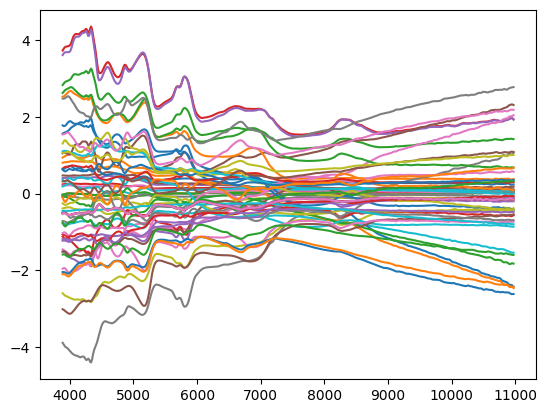

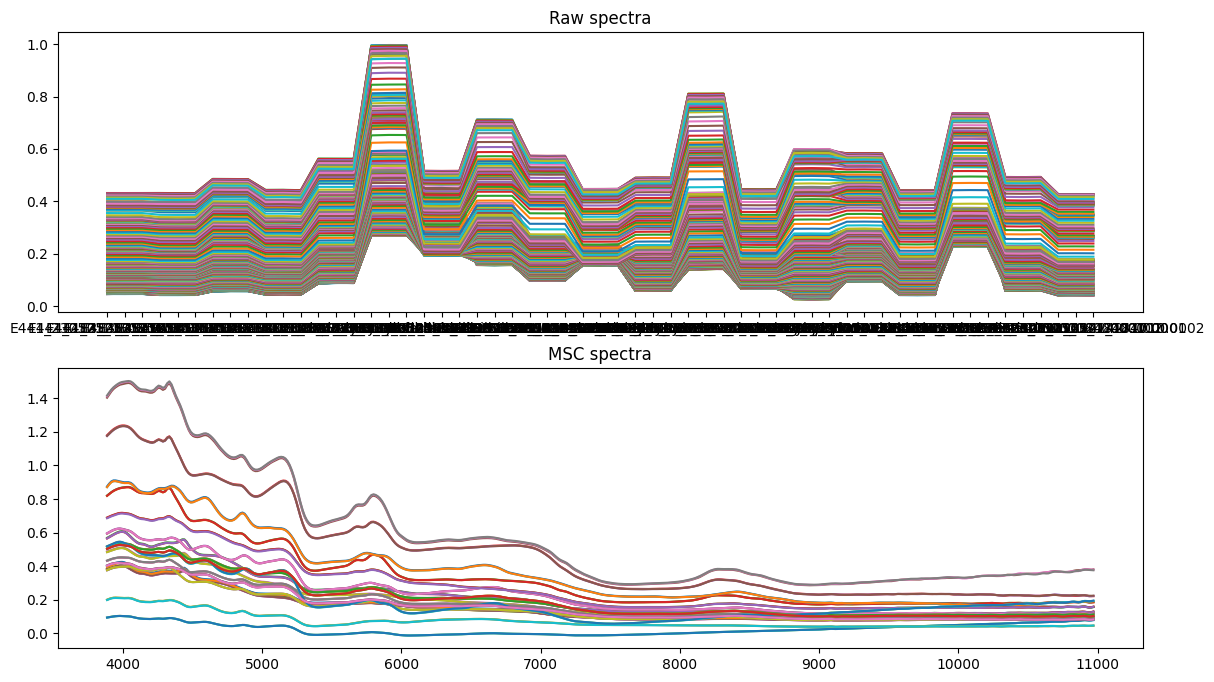

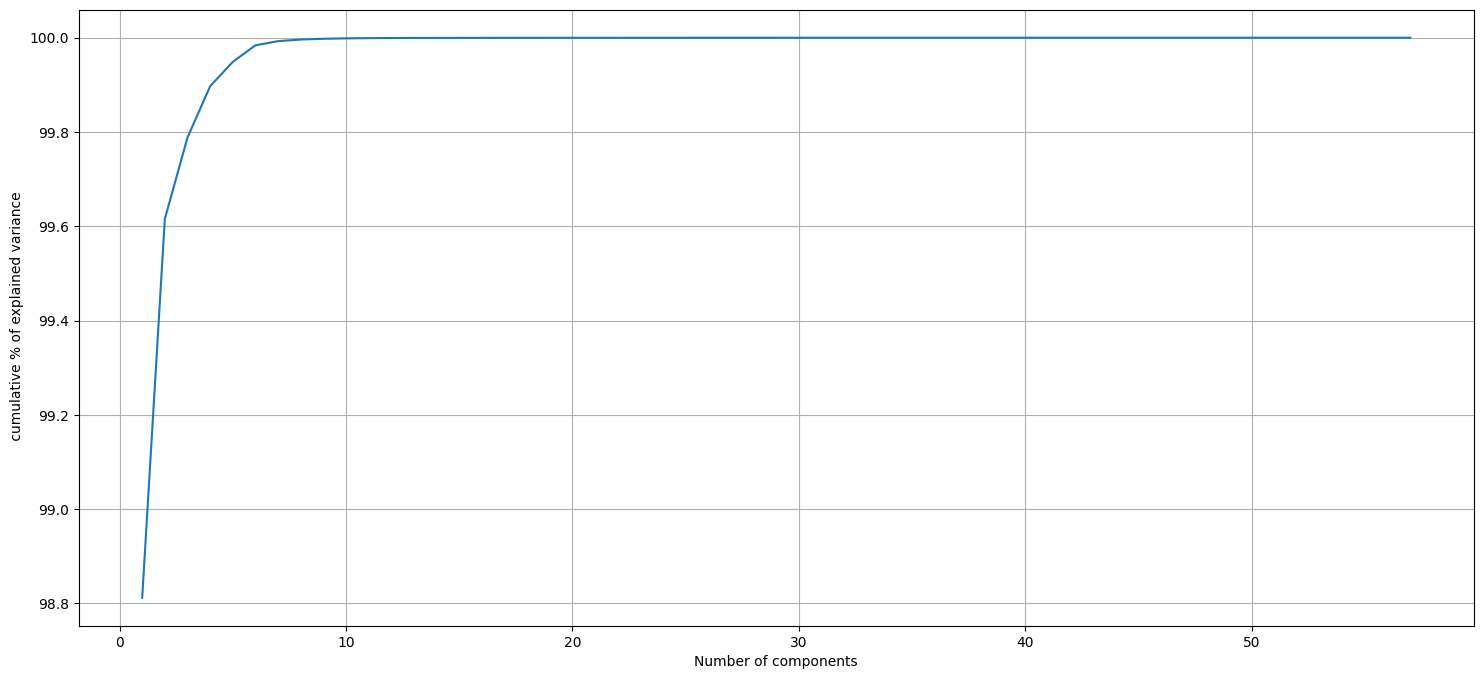

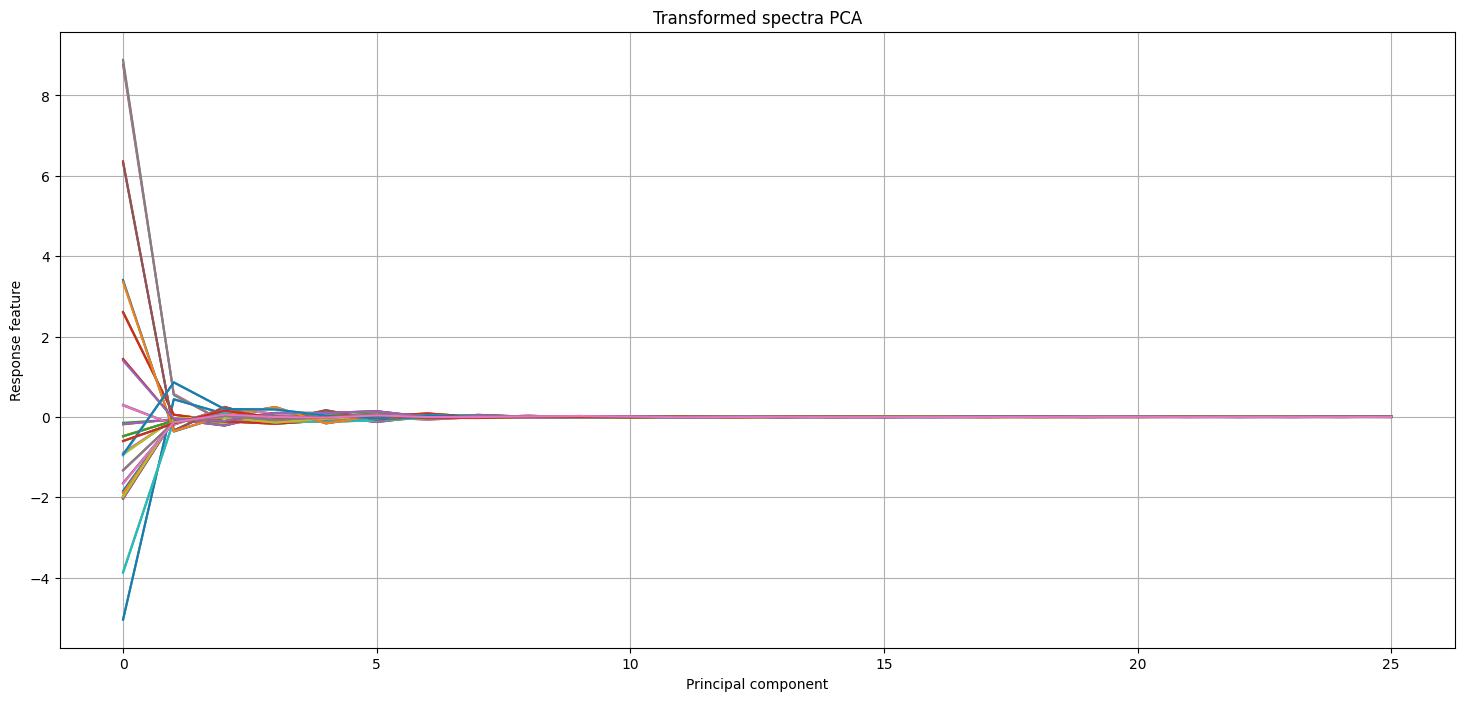

ValueError: Error: Input data is not in a valid format. Please confirm that the input data is scikit-learn compatible. For example, the features must be a 2-D array and target labels must be a 1-D array.

In [96]:
# test
import tpot
from tpot import TPOTRegressor
from sklearn.model_selection import RepeatedKFold
from pyspectra.transformers.spectral_correction import msc, detrend ,sav_gol,snv
#Rescale to NN friendly number range
import matplotlib.pyplot as plt
%matplotlib inline

from ChemUtils import GlobalStandardScaler

infodf = mod_info

#dict_keys(['230428', '230503', '230511', '230512', '230515', '230518', '230519', '230521', '230522', '230528', '230605', '230606', '230610', '230612', '2ndanalysis'])
key = "230521"
df = data[key]
Y = data[key].values
colm = data[key].columns
ind = data[key].index
idf = infodf[infodf['Experiment'].isin(data[key].columns)]
# print(colm)
# print("idf",idf)
Y = savgol_filter(Y, int(6), polyorder =2, deriv =1)
labels = idf['Group']
le = LabelEncoder().fit_transform(labels)
unique = list(set(le))





In [ ]:
# test
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model = TPOTRegressor(generations=10, population_size=50, scoring='neg_mean_absolute_error',
                      cv=cv, verbosity=2, random_state=1, n_jobs=-1)
                      
xscaler = GlobalStandardScaler()
X_train = xscaler.fit_transform(Y.T)
# X_test = xscaler.transform(dataset['calibrate_2'])

print(X_train.std()) 
print(X_train.mean()) 
print(X_train.max())
_ = plt.plot(ind,X_train.T)

### 
MSC = msc()
MSC.fit(df.T)
df_msc = MSC.transform(df.T)
f, ax= plt.subplots(2,1,figsize=(14,8))
ax[0].plot(df.transpose())
ax[0].set_title("Raw spectra")

ax[1].plot(df_msc.transpose())
ax[1].set_title("MSC spectra")
plt.show()

pca = PCA()
pca.fit(df_msc)
plt.figure(figsize = (18, 8))
plt.plot(range(1,len(pca.explained_variance_)+1),100*pca.explained_variance_.cumsum()/pca.explained_variance_.sum())
plt.grid(True)
plt.xlabel("Number of components")
plt.ylabel(" cumulative % of explained variance")

df_pca=pd.DataFrame(pca.transform(df_msc))
plt.figure(figsize=(18,8))
plt.plot(df_pca.loc[:,0:25].transpose())


plt.title("Transformed spectra PCA")
plt.ylabel("Response feature")
plt.xlabel("Principal component")
plt.grid(True)
plt.show()

x = df_pca.loc[:,0:25]
model.fit(x, wl)
# fig = plt.figure(figsize=(10,9))
# sub = fig.add_subplot(111, projection="3d")
# print(len(Xpca[:,0]))

# for i, u in enumerate(unique):
#     xi = [Xpca[j,0] for j  in range(len(Xpca[:,0])) if le[j] == u]
#     yi = [Xpca[j,1] for j  in range(len(Xpca[:,1])) if le[j] == u]
#     zi = [Xpca[j,2] for j  in range(len(Xpca[:,2])) if le[j] == u]
#     sub.scatter(xi, yi, zi, color=colors[i], s=80, label=str(u))
 
#     sub.view_init(10, 40)
 
#     sub.set_xlabel('PC1')
#     sub.set_ylabel('PC2')
#     sub.set_zlabel('PC3')
 
#     plt.legend(labels.unique(),loc='upper left')
 
# plt.show()

In [59]:
import numpy as np
from sklearn.datasets import make_friedman1
from sklearn.decomposition import SparsePCA
X, _ = make_friedman1(n_samples=200, n_features=30, random_state=0)


IndexError 230428 O47_res32_001_230428_104409.0001
IndexError 230428 O47_res32_001_230428_104409.0002
IndexError 230503 O946_001_230503_154755.0001
IndexError 230503 O946_001_230503_154755.0002
IndexError 230519 땅심이 O2_230519_212526.0000
IndexError 230519 땅심이 O2_230519_212526.0001
IndexError 230519 땅심이 O2_230519_212526.0002
IndexError 230519 땅심이 O3_230519_212655.0000
IndexError 230519 땅심이 O3_230519_212655.0001
IndexError 230519 땅심이 O3_230519_212655.0002
IndexError 230519 땅심이 O4_230519_212828.0000
IndexError 230519 땅심이 O4_230519_212828.0001
IndexError 230519 땅심이 O4_230519_212828.0002
IndexError 230519 땅심이 O5_230519_212948.0000
IndexError 230519 땅심이 O5_230519_212948.0001
IndexError 230519 땅심이 O5_230519_212948.0002
IndexError 230528 E8_230528_153644.0001
IndexError 230528 E8_230528_153644.0002
IndexError 230605 O099_230605_213638.0001
IndexError 230605 O099_230605_213638.0002
IndexError 230606 E050_230606_193559.0001
IndexError 230606 E050_230606_193559.0002
IndexError 230610 E075_230610_

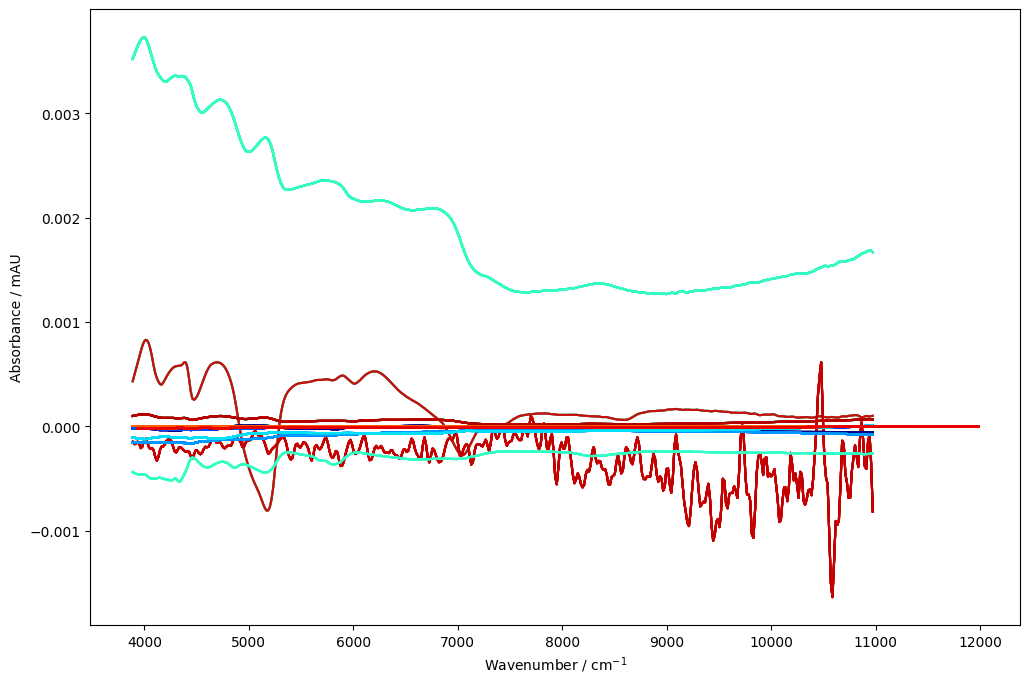

In [56]:
# plot Whittaker

fig = plt.figure(figsize=(12, 8))
lines = plot_Whittaker(data=data, infodf=mod_info)
plt.xlabel(r'Wavenumber / $\mathrm{cm^{-1}}$')
plt.ylabel('Absorbance / mAU')
plt.show()


IndexError 230519 땅심이 O2_230519_212526.0000
IndexError 230519 땅심이 O2_230519_212526.0001
IndexError 230519 땅심이 O2_230519_212526.0002
IndexError 230519 땅심이 O3_230519_212655.0000
IndexError 230519 땅심이 O3_230519_212655.0001
IndexError 230519 땅심이 O3_230519_212655.0002
IndexError 230519 땅심이 O4_230519_212828.0000
IndexError 230519 땅심이 O4_230519_212828.0001
IndexError 230519 땅심이 O4_230519_212828.0002
IndexError 230519 땅심이 O5_230519_212948.0000
IndexError 230519 땅심이 O5_230519_212948.0001
IndexError 230519 땅심이 O5_230519_212948.0002


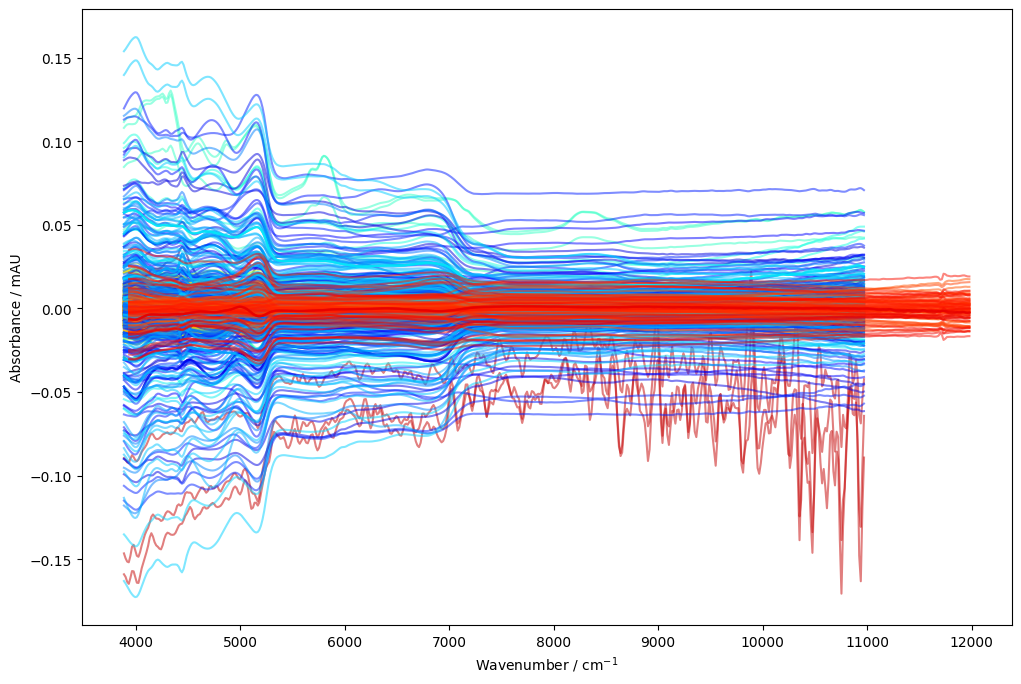

In [86]:
# plot savgol
fig = plt.figure(figsize=(12, 8))
lines = plot_Savgol(data=data, infodf=mod_info, win_size = 6)
plt.xlabel(r'Wavenumber / $\mathrm{cm^{-1}}$')
plt.ylabel('Absorbance / mAU')
plt.show()


230428 0     E46
1     E46
2     E46
3     E47
4     E47
5     E47
6     O46
7     O46
8     O46
9     O47
10    O47
11    O47
Name: Group, dtype: object
IndexError 230428 E46_res32_001_230428_104059.0000
IndexError 230428 E46_res32_001_230428_104059.0001
IndexError 230428 E46_res32_001_230428_104059.0002
IndexError 230428 E47_res32_001_230428_105353.0000


UnboundLocalError: cannot access local variable 'xi' where it is not associated with a value

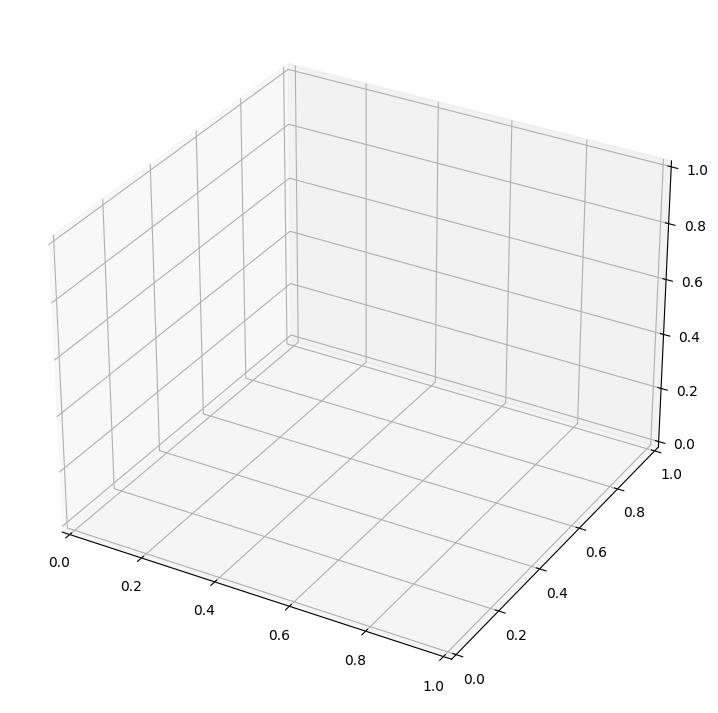

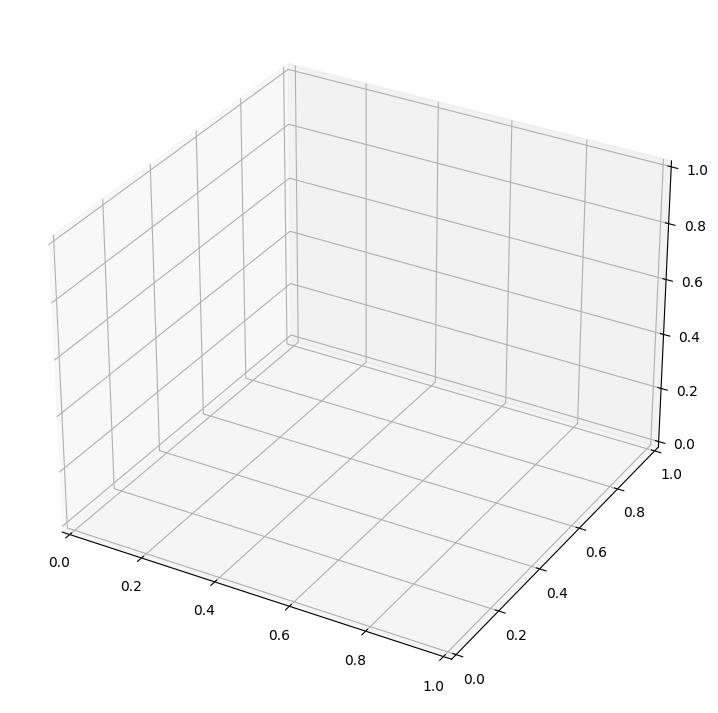

In [66]:
res = pca_Savgol(data=data, infodf=mod_info, win_size = 6)
res

In [7]:
import pickle
with open('../pickle/res_dict.pickle', "wb") as fw:
    pickle.dump(res, fw)

In [ ]:
import pickle
with open('../pickle/res_dict.pickle', 'rb') as fr:
          res = pickle.load(fr)

In [ ]:
pca = PCA(n_components=3)
Xpca = pca.fit_transform(StandardScaler().fit_transform(X1))

